In [2]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
series = pd.read_csv("../data/final_tables/erco/erco_train.csv")["Normalized Demand"]

<Figure size 1152x432 with 0 Axes>

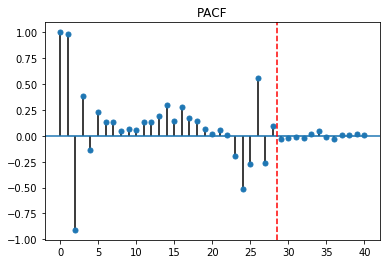

In [17]:
# Plot PACF: To help determine 'p'
plt.figure(figsize=(16, 6))
plot_pacf(series, lags=40)  # Adjust 'lags' as needed
plt.axvline(x=28.5, color='red', linestyle='--')
plt.title('PACF')
plt.savefig(f"/Users/aidanwiteck/Desktop/Princeton/Year 4/Thesis/Homeworks/SpringInterimReport/arima_pacf.pdf", 
            format="pdf", 
            bbox_inches="tight")
plt.show()

<Figure size 1152x432 with 0 Axes>

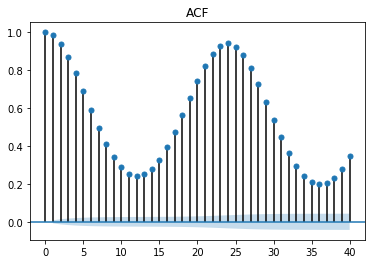

In [9]:
# Plot ACF: To help determine 'q'
plt.figure(figsize=(16, 6))
plot_acf(series, lags=40)  # Adjust 'lags' as needed
plt.title('ACF')
plt.show()

In [7]:
df_train = pd.read_csv("../data/final_tables/sarimax/train.csv")

In [8]:
df_train

,Normalized Demand,temperature,cloudcover,humidity,windspeed,temperature_24h_ahead,cloudcover_24h_ahead,humidity_24h_ahead,windspeed_24h_ahead,year_2016,...,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,Region_banc,Region_erco,Region_isne
0,-0.139874,-1.384576,-0.952066,0.275873,-0.078418,-1.310726,-0.260217,0.450527,-1.042928,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.277310,-1.393807,-0.872237,0.101219,0.050183,-1.412270,-0.047340,0.625181,-1.091154,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.378975,-1.403039,-0.925456,-0.029771,-0.448147,-1.449195,0.378413,0.712508,-0.785726,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.450518,-1.412270,-0.739189,-0.160762,-0.207020,-1.467657,0.431633,0.756171,-0.850026,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.474992,-1.421501,-0.526312,-0.204425,-0.078418,-1.495351,0.591290,0.799835,-0.978628,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184030,0.107299,-0.710693,-0.153778,0.494190,-0.142719,-0.729156,1.708892,1.498450,-0.608899,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
184031,0.009806,-0.719925,-0.100559,0.625181,0.259160,-0.766081,1.442797,1.498450,-0.850026,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
184032,-0.307142,-0.710693,-0.073949,0.625181,0.500288,-0.793775,1.496016,1.498450,-0.721425,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
184033,-0.624472,-0.701462,-0.100559,0.625181,0.677115,-0.766081,1.629064,1.498450,-0.351696,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [10]:
df_train["Normalized Demand"].shift(-1).dropna()

0        -0.277310
1        -0.378975
2        -0.450518
3        -0.474992
4        -0.431691
            ...   
184029    0.107299
184030    0.009806
184031   -0.307142
184032   -0.624472
184033   -0.920774
Name: Normalized Demand, Length: 184034, dtype: float64

In [ ]:
# Assuming your DataFrame is named df and is indexed by date
# And assuming "Normalized Demand" is your target variable

train = df.iloc[:-24]  # Everything but the last 24 hours
test = df.iloc[-24:]   # The last 24 hours

# Exogenous variables (make sure to exclude the target variable from this set)
exog_vars = [
    "temperature",
    "cloudcover",
    "humidity",
    "windspeed",
    "temperature_24h_ahead",
    "cloudcover_24h_ahead",
    "humidity_24h_ahead",
    "windspeed_24h_ahead",
    # Add the one-hot encoded calendar variables and any other variables you consider relevant
]

exog_train = train[exog_vars]
exog_test = test[exog_vars]
